In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
dataset.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [43]:
dataset.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


### Missing Values

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

card_present_flag 0.3592  % missing values
bpay_biller_code 0.9265  % missing values
merchant_id 0.3592  % missing values
merchant_code 0.9267  % missing values
merchant_suburb 0.3592  % missing values
merchant_state 0.3592  % missing values
merchant_long_lat 0.3592  % missing values


### Since they are many missing values, we need to find the relationship between missing values and amount
Let's plot some diagram for this relationship

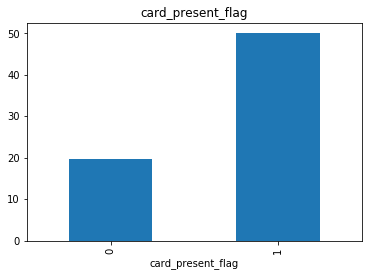

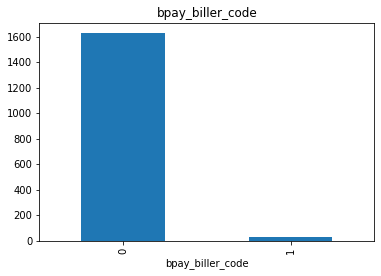

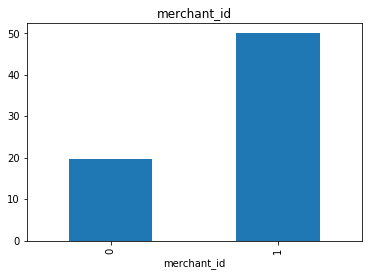

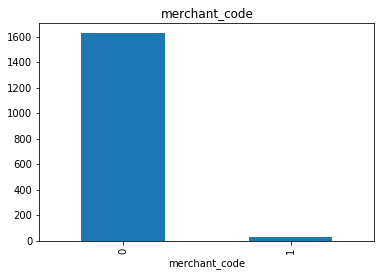

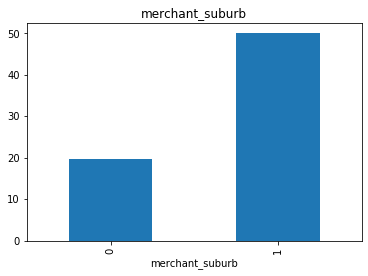

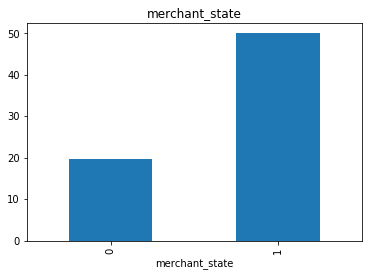

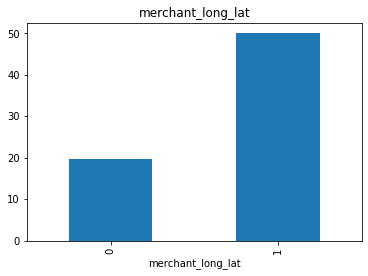

In [7]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['amount'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Numerical Variables

In [8]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  6


,card_present_flag,merchant_code,balance,date,age,amount
0,1.0,NaN,35.39,2018-08-01,26,16.25
1,0.0,NaN,21.20,2018-08-01,26,14.19
2,1.0,NaN,5.71,2018-08-01,38,6.42
3,1.0,NaN,2117.22,2018-08-01,40,40.90
4,1.0,NaN,17.95,2018-08-01,26,3.25


### Dropping out Not Necessary Feature

In [39]:
dataset = dataset[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
#dataset["date"] = pd.to_datetime(dataset["date"])
dataset.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


### Total number of Transcation made by coustomer

In [38]:
dataset["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Total number of transcation made on each day

In [14]:
dataset["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

### Transcation volume each day

In [17]:
dataset_date_count = dataset.groupby("date").count()

In [60]:
transaction_vol = dataset_date_count["customer_id"].mean()
n_points = len(dataset_date_count.index)

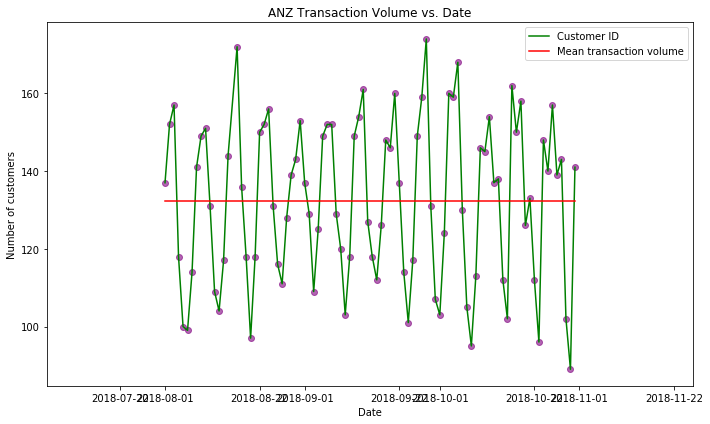

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(dataset_date_count.index, dataset_date_count["customer_id"],alpha=0.6,c='purple')
plt.plot(dataset_date_count.index, dataset_date_count["customer_id"], c="green", label = "Customer ID")
plt.plot(dataset_date_count.index, np.linspace(transaction_vol,transaction_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()

plt.tight_layout()

### Now mean of transaction amount

In [62]:
dataset_date_mean = dataset.groupby("date").mean()

In [63]:
transaction_amt = dataset_date_mean["amount"].mean()
n_points = len(dataset_date_count.index)

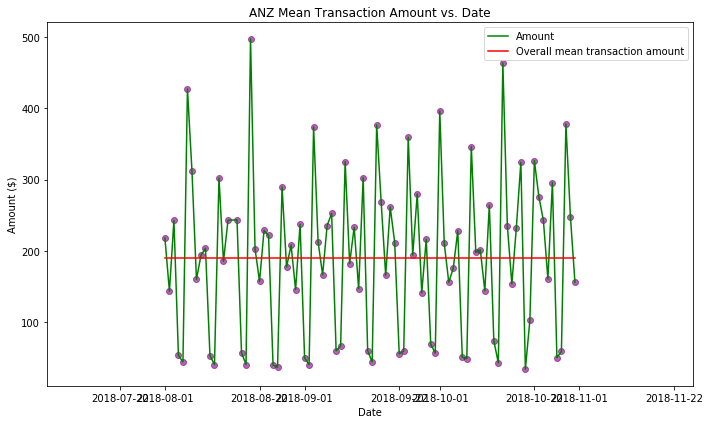

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(dataset_date_count.index, dataset_date_mean["amount"],alpha=0.6,c='purple')
plt.plot(dataset_date_count.index, dataset_date_mean["amount"], c="green", label = "Amount")
plt.plot(dataset_date_count.index, np.linspace(transaction_amt,transaction_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

### Now transactions do customers make each month wise
 

In [68]:
##  Likely to be there are 3-months probably August,September,October
months = []
for date in dataset["date"]:
    if date.month == 7:
        months.append("July")
    elif date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")
    elif date.month ==11:
        months.append("November")

dataset["Months"] = months
dataset["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

### coustomer Balance Mean and Payment Amount of People by Age

In [69]:
dataset_customer_august = dataset[dataset["Months"] == "August"].groupby("customer_id").mean()
dataset_gender_august = dataset[dataset["Months"] == "August"].groupby("gender").mean()

### Now taking Male and Female Balance

In [83]:
mean_female_bal_august = dataset_gender_august["balance"].iloc[0]
mean_male_bal_august = dataset_gender_august["balance"].iloc[1]
n_points = len(dataset_customer_august["age"])

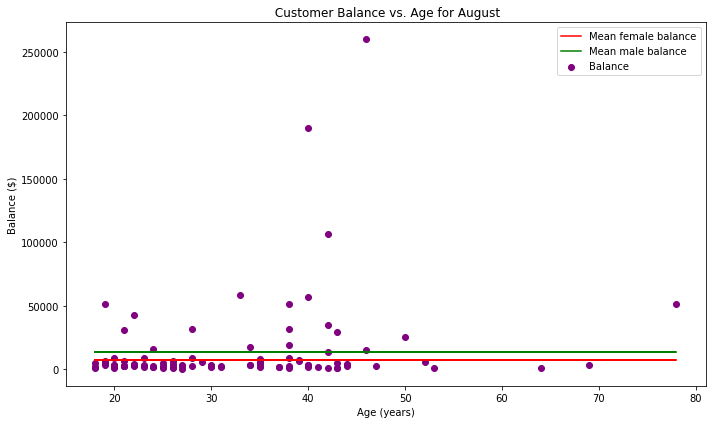

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(dataset_customer_august["age"], dataset_customer_august["balance"], c="purple", label="Balance")
plt.plot(dataset_customer_august["age"], np.linspace(mean_female_bal_august,mean_female_bal_august,n_points), c="red", label = "Mean female balance")
plt.plot(dataset_customer_august["age"], np.linspace(mean_male_bal_august,mean_male_bal_august,n_points), c="green", label = "Mean male balance")
plt.title(" Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()